## Numerical Algorithms - Homework Assignment 1
Due to 24.04.2018.

**1.** _(0.5 points)_ The IEEE standard 754 (known as the "floating-point standard") specifies the 128-bit word as having 15 bits for the exponent.

 * What is the length of the fraction (mantissa)? What is the machine epsilon?  
 * How many significant decimal digits does this word have?  
 * Why is quadruple precision more than twice as accurate as double precision, which is in turn more than twice as accurate as single precision?

**Answer:**
* Length of the mantissa is 112 bit. Machine epsilon is $\epsilon = 2^{-113}$. ([Source](https://en.wikipedia.org/wiki/Quadruple-precision_floating-point_format))
* $log_{10}(2^{113}) = 34.01..$ - a 128-bit word in the IEEE standard has approximately 34 significant decimal digits. According to [1], due to the leading exponent bit (that might be zero) and whether input/output is a decimal string or a IEEE 754-compliant quadruple-precision number, between 33 and 36 significant decimal digits are possible.
* Because the correlation between the number of significant digits (which is approximately doubled from half- to single- to double-...precision) and the resulting precision is exponential and not linear w.r.t. to the number of available bits/digits - see equation for the calculation of the machine epsilon.

[1] _William Kahan (1 October 1987). "Lecture Notes on the Status of IEEE Standard 754 for Binary Floating-Point Arithmetic"_

**2.** _(1 point)_ The IEEE standard 754 specifies that all arithmetic operations are to be
performed as if they were first calculated to infinite precision and then rounded
according to one of four modes. The default rounding mode is to round to the
nearest representable number, with rounding to even (zero least significant bit) in
the case of a tie.

Which of the following statements is true in IEEE arithmetic, assuming that a and
b are normalized floating point numbers and that no exception occurs in the stated
operations? In each case, give a short explanation.   
  
a) $fl(a\;op\;b) = fl(b\;op\;a);\;op = +;\;∗:$  
b) $fl(a + a) = fl(2 ∗ a)$  
c) $fl((a + b) + c) = fl(a + (b + c))$

**Answer:**

a) True, since both specified operations are commutative and there are no intermediate rounding steps.  
b) True, since both expressions are equivalent and there aren't any intermediate rounding steps.  
c) False. Consider that $fl(x\;op\;y) = (x\;op\;y)(1 + \delta)$. In the left-hand side expression $a$ is involved indirectly in two rounding operations, $c$ in one; in the right-hand side expression the other way around. According to the accuracy model before the left-hand side expression yields to an forward error of  
$$
fl((a + b) + c) = ((a + b)(1 + \delta) + c)(1 + \delta) = ((a + b) + \delta(a + b) + c)(1 + \delta)
$$
while the right-hand side expression yields
$$
fl(a + (b + c)) = (a + (b + c)(1 + \delta))(1 + \delta) = (a + (b + c) + \delta(b + c))(1 + \delta)
$$  
Therefore: If $a > c$, the right-hand side expression leads to a smaller forward error; if $c > a$, the left-hand side expression.

**3.** _(2.5 points)_ Using the standard model of floating point arithmetic introduced in the lecture, derive forward and backward error bounds for a simple summation, in which the $x_i$ are machine numbers and the sum is evaluated from left to right<sup>1</sup>.

<sup>1</sup>: E.g. $S_4 = ((x_1 + x_2) + x_3) + x_4$.

**Answer:** sdflkjsdf

### Programming Exercise

The task is to implement an LU factorization-based linear solver in OCTAVE and to
evaluate its accuracy for various test matrices. The solver consists of computing the LU
decomposition of a square $n×n$ double precision matrix $A$ such that $A = LU$ with lower
triangular $L$ and upper triangular $U$ and subsequent forward and back substitution. In
particular:

#### Part I - LU Decomposition (3 points)
First implement the standard "scalar" (unblocked) algorithm (i.e. three nested loops)
with partial pivoting.

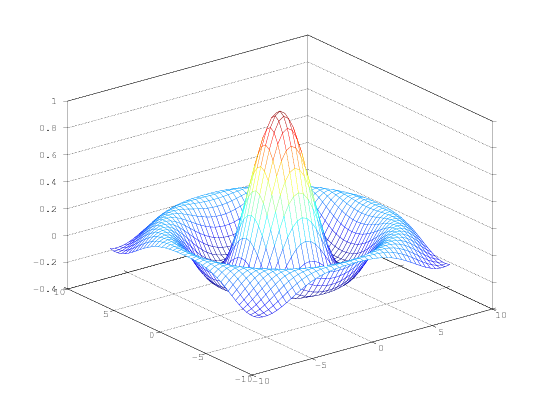

In [1]:
%plot --format png
tx = ty = linspace (-8, 8, 41)';
[xx, yy] = meshgrid (tx, ty);
r = sqrt (xx .^ 2 + yy .^ 2) + eps;
tz = sin (r) ./ r;
mesh (tx, ty, tz);

#### Part II - Solving a Triangular Linear Systems (1 point)
1. Forward substitution: Write a routine which solves a given $n×n$ lower triangular linear system $Lx = b$ for $x$.
2. Back substitution: Write another routine which solves a given $n × n$ upper triangular linear system $Ux = b$ for $x$.
3. Evaluate the accuracy of your codes for increasing n in terms of the relative residual and the relative forward error. (For the definition of relative residual and relative forward error please see Part III!)  
  
For these experimental evaluations, use randomly generated (non-singular) $L$ and $U$ and determine $b$ such that the exact solution $x$ is a vector of all ones: $x = (1; 1; ...; 1; 1)T$.

#### Part III - Numerical Accuracy of LU-Based Linear Solver (4 points)

The main purpose of this part is to experimentally evaluate the numerical accuracy of
the linear systems solver you implemented in Parts I and II for different test matrices
and to compare it with the built-in solver from OCTAVE. You can solve a linear system
Ax = b for x using the n operator (e.g. x = A n b).

1\. Take your LU factorization from Part I and combine it with your triangular linear systems solvers from Part II in order to get a complete LU-based linear solver.  
  
2\. Input data for your experiments:  
a) Generate random test matrices S with entries uniformly distributed in the interval $[-1,1]$.  
b) Generate test matrices H which are defined by $$H_{ij} := \frac{1}{i + j − 1}\;for\;i = 1;...;\;n\;and\;j = 1; ...; n.$$  
c) In all your test cases, determine the corresponding right hand side b of length n such that the exact solution x of the linear system is a vector of all ones: $x = (1; 1; : : : ; 1; 1)^T$.  

3\. Solve the linear systems $Sx = b$ and $Hx = b$ with your LU-based linear solver and the built-in OCTAVE solver and evaluate the numerical accuracy of the computed solution.  
a) Problem sizes: Start with $n = 2; 3; 4; 5; ...;10$ then incease in increments of 5. For $n > 50$ you can further increase the increment. The largest value of $n$ should be as large as possible (so that your code terminates within a reasonable time).  
\tb) Accuracy: For the computed solution ^ x, evaluate the relative residual r:
$$r := \frac{||M\hat{x} - b||_1}{||b||_1} $$
($M$ is $S$ or $H$) as well as the relative forward error $f$:
$$f := \frac{||\hat{x} - x||_1}{||x||_1} $$

4\. For both your and the OCTAVE solver generate the following plots for the different
test matrices:
a) Relative residual and relative forward error in $\hat{x}$ vs. $n$: One figure for both accuracy metrics for matrix type $S$, another figure for both accuracy metrics for matrix type $H$.

5\. Interpret and explain your experimental results in your report. Do you think that there is a fundamental difference in the numerical accuracy which your LU-based linear solver achieves for the two types of test matrices? If yes, explain the reasons for this difference. How does your solver compare to the OCTAVE version?